In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from tqdm import tqdm, trange
tqdm.pandas()
import shapefile as shp
import geopy.distance as dist
from shapely.geometry import Point, Polygon
import sys
sys.path.append("../utils/")
from vis_utils import *


trips = pd.read_csv('../data/20210716-23-scooterdata-trips-processed.csv')
shp_path = '../data/Census_Block_Groups_2010/Census_Block_Groups_2010.shp'
sf = shp.Reader(shp_path)
blocks = read_shapefile(sf)

<ipython-input-1-2d2564bd962d>:3: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
C:\Users\evanj\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


100%|██████████████████████████████████████████████████████████████████████████████| 482/482 [00:00<00:00, 1185.86it/s]


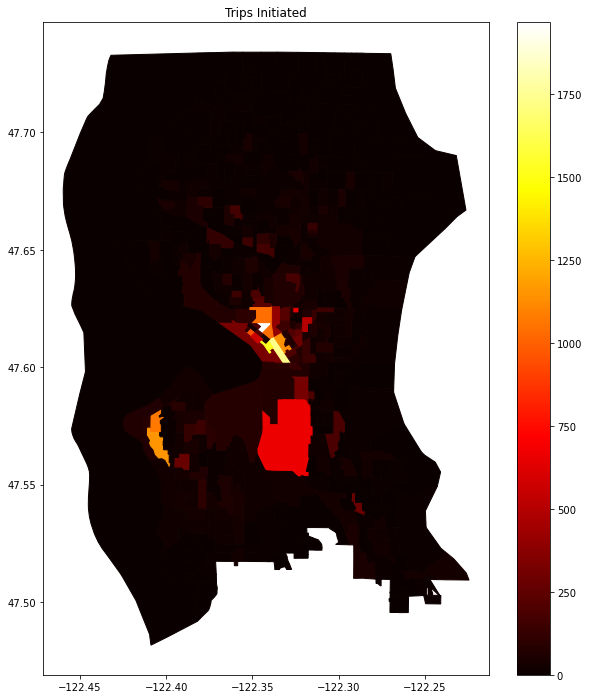

100%|██████████████████████████████████████████████████████████████████████████████| 482/482 [00:00<00:00, 1268.48it/s]


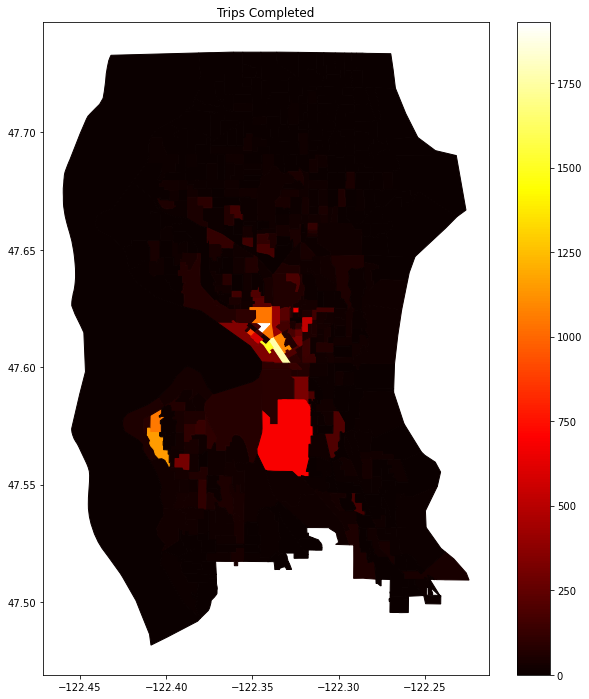

100%|███████████████████████████████████████████████████████████████████████████████| 482/482 [00:00<00:00, 789.52it/s]


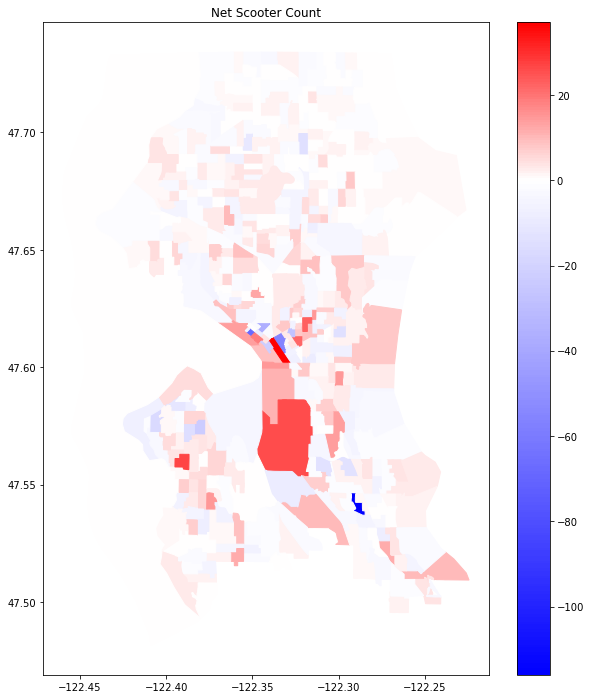

In [10]:
start_trips = np.zeros(len(blocks))
end_trips = np.zeros(len(blocks))
for i in trange(1,len(blocks)):
    start_trips[i] = trips[trips['block_start']==i].shape[0]
    end_trips[i] = trips[trips['block_end']==i].shape[0]
counts = np.array([start_trips,end_trips,end_trips-start_trips])
cmaps = [plt.cm.hot, plt.cm.hot, plt.cm.bwr]
titles = ['Trips Initiated','Trips Completed','Net Scooter Count']

for j in range(3):
    cmap = cmaps[j]
    if counts[j].min()>=0:
        norm = matplotlib.colors.Normalize(vmin=counts[j].min(), vmax=counts[j].max())
    else:
        norm = matplotlib.colors.TwoSlopeNorm(vmin=counts[j].min(), vcenter=0., vmax=counts[j].max())
    fig,ax = plt.subplots(figsize=(10,12))
    for i in trange(len(blocks)):
        fill_shape(sf,i,ax,color=cmap(norm(counts[j,i])))
    ax.set_title(titles[j])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    fig.colorbar(sm)
    plt.savefig('../figures/'+titles[j]+'.png', format='png')
    plt.show()

In [4]:
starts = trips.block_start.to_numpy()
ends = trips.block_end.to_numpy()
trip_corr = np.zeros((len(blocks),len(blocks)))
for i in trange(trip_corr.shape[0]):
    for j in range(trip_corr.shape[1]):
        trip_corr[i,j] = len(np.intersect1d(np.where(starts==i),np.where(ends==j)))

100%|████████████████████████████████████████████████████████████████████████████████| 482/482 [00:15<00:00, 30.31it/s]


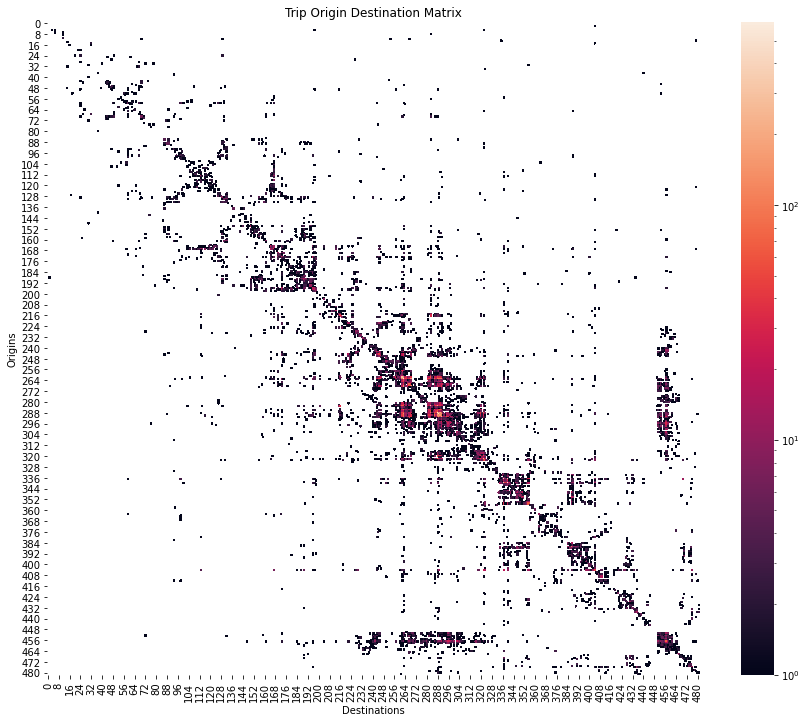

In [5]:
fig,ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(trip_corr, square=True, norm=LogNorm())
ax.set_title('Trip Origin Destination Matrix')
ax.set_ylabel('Origins')
ax.set_xlabel('Destinations')
plt.savefig('../figures/scooter_od_matrix.png',format='png')
plt.show()